# Ford GoBike Analysis 2017 - Aug 2020
#### <font color="green"> by Byron Thompson

## Investigation Overview

> The goal of this presentation is to provide the reader with a comprehensive analysis of the GoBike data that will highlight the success, or not, of the Ford GoBike scheme and to highlight the populous trends when it comes to usuage during the year and who the bikes are used by.

> Upon answering the above questions I will then conclude with what I think the data means as an avid cycle commuter myself.

## Dataset Overview

> The data that I will be investigating is taken from the Ford GoBike System Data site which contains record on millions of bike hires from 2017 to 2020.  For the purposes of this report that data that I analysed was from 2017 - Aug 2020.  

> The content of my dataset has 5,124,358 entries and 174,729 rows, there are 19 columns.  This is the result of a data cleaning exercise where millions of missing values were removed as well as 11 columns which were surplus to requirements.
           

In [2]:
# import relevant libraries into Jupyter Notebooks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import time
import datetime
import haversine

Matplotlib is building the font cache; this may take a moment.


In [3]:
# gather ('read in') all 4 years monthly csv files
df_Ford_Go_Bike_2017_2020_Master  = pd.concat(map(pd.read_csv, ['2017-fordgobike-tripdata.csv', '201801-fordgobike-tripdata.csv', '201802-fordgobike-tripdata.csv','201803-fordgobike-tripdata.csv',
'201804-fordgobike-tripdata.csv', '201805-fordgobike-tripdata.csv', '201806-fordgobike-tripdata.csv', '201807-fordgobike-tripdata.csv', '201808-fordgobike-tripdata.csv', 
'201809-fordgobike-tripdata.csv', '201810-fordgobike-tripdata.csv', '201811-fordgobike-tripdata.csv', '201812-fordgobike-tripdata.csv', '201901-fordgobike-tripdata.csv', '201902-fordgobike-tripdata.csv','201903-fordgobike-tripdata.csv',
'201904-fordgobike-tripdata.csv', '201905-fordgobike-tripdata.csv', '201906-fordgobike-tripdata.csv', '201907-fordgobike-tripdata.csv', '201908-fordgobike-tripdata.csv', 
'201909-fordgobike-tripdata.csv', '201910-fordgobike-tripdata.csv', '201911-fordgobike-tripdata.csv', '201912-fordgobike-tripdata.csv', '202001-fordgobike-tripdata.csv', '202002-fordgobike-tripdata.csv','202003-fordgobike-tripdata.csv',
'202004-fordgobike-tripdata.csv', '202005-fordgobike-tripdata.csv', '202006-fordgobike-tripdata.csv', '202007-fordgobike-tripdata.csv', '202008-fordgobike-tripdata.csv']))
print(df_Ford_Go_Bike_2017_2020_Master.shape)  

C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\IPython\core\interactiveshell.py:3417: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(6483502, 25)


In [4]:
# create a 'clean' copy of the df 
df_Ford_Go_Bike_2017_2020_Master_CLEAN = df_Ford_Go_Bike_2017_2020_Master.copy()

In [5]:
# DATA WRANGLING - Clean Copy v2

# converts [start_time] to datetime type 
df_Ford_Go_Bike_2017_2020_Master_CLEAN.start_time = pd.to_datetime(df_Ford_Go_Bike_2017_2020_Master_CLEAN.start_time)

# converts [end_time] to datetime type 
df_Ford_Go_Bike_2017_2020_Master_CLEAN.end_time = pd.to_datetime(df_Ford_Go_Bike_2017_2020_Master_CLEAN.end_time)

# create a 'clean' copy of the df 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v2 = df_Ford_Go_Bike_2017_2020_Master_CLEAN.copy()

In [6]:
# DATA WRANGLING - Clean Copy v3

# Removes columns from ID 13 onwards 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v2 = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v2.drop(['bike_share_for_all_trip','rental_access_method', 'ride_id', 'rideable_type'
, 'started_at', 'ended_at', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'is_equity'],axis=1)

# create a 'clean' copy of the df 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3 = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v2.copy()


In [7]:
# DATA WRANGLING - Clean Copy v4

# removes all null vales in any row
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3 = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3.dropna(how='any',axis=0) 

# create a 'clean' copy of the df 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4 = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v3.copy()

In [8]:
# DATA WRANGLING - Clean Copy v5 (step 1)

# creates additional min, hour, week, month and year columns from the [start_time_ variable]
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['duration_min'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['duration_sec']/60
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_hour'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_time'].dt.hour
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_day_of_week'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_time'].dt.strftime('%a')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_month'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_time'].dt.strftime('%B')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['year'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_time'].dt.strftime('%Y')


In [9]:
# Calculating distance using vectorized operations (far quicker)
# source: https://stackoverflow.com/questions/25767596/vectorised-haversine-formula-with-a-pandas-dataframe

def haversine(lon1, lat1, lon2, lat2):
    '''Vectorized Distance Function
    inputs: lon/lat pair of origin
            lon/lat pair of destination
    output: distance, in km, between locations'''
    
    lon1, lat1, lon2, lat2=map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km
    
# create distancevariable, i.e. call distance function on pairs of lon/lat geocoordinates
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['distance_km'] = haversine(df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_station_longitude'],
                                    df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_station_latitude'],
                                    df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['end_station_longitude'],     
                                    df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['end_station_latitude']);


In [10]:
# DATA WRANGLING - Clean Copy v5 (step 3)
# converts variables [user_type], [start_hour], [start_week], [start_month] & [year] to categorical type 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['user_type']=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['user_type'].astype('category')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_hour']=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_hour'].astype('category')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_day_of_week']=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_day_of_week'].astype('category')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_month']=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['start_month'].astype('category')
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['year']=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4['year'].astype('category');

In [11]:
# DATA WRANGLING - Clean Copy v5 (step 4)
# create a 'clean' FINAL copy of the df 
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5 = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v4.copy()

### <font color="green"> Hire hours

Between 2017 and August 2020 users clocked up a total of **5,124,358** hours.

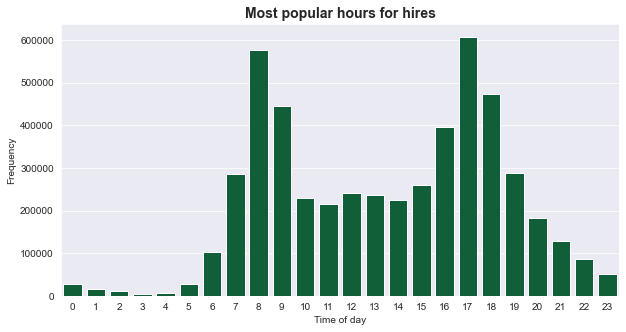

In [12]:
# returns most popular count for hours of day
plt.rcParams['figure.figsize'] = 10, 5
base_color = sns.color_palette('YlGn_r')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='start_hour', color=base_color);
plt.title('Most popular hours for hires', weight='bold').set_fontsize('14')
plt.xlabel('Time of day');
plt.ylabel('Frequency');

There is a clear distinction in morning and evening rides, this infers that the majority of users are people going to and from work as circa 57k users hire a bike at 08:00 and circa 60+k users hire a bike at 17:00.  

In [13]:
# Convert the start_day_of_week to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['start_day_of_week'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['start_day_of_week'].astype(ordered_weekdays)


### <font color="green"> Hires over a week
Below is an illustration of bike hires over a week.


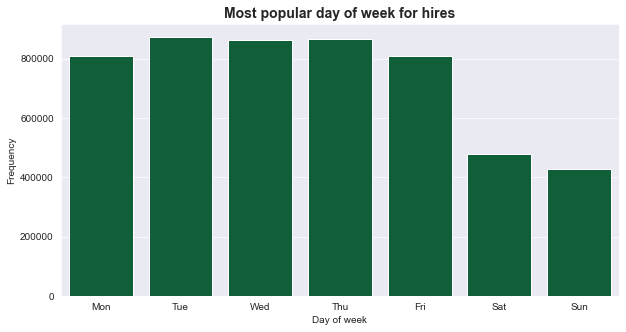

In [14]:
# Most popular day of the week for hiring bikes
plt.rcParams['figure.figsize'] = 10, 5
base_color = sns.color_palette('YlGn_r')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='start_day_of_week', color=base_color);
plt.title('Most popular day of week for hires', weight='bold').set_fontsize('14')
plt.xlabel('Day of week');
plt.ylabel('Frequency');

The above chart further reinforces my assumption that the highest users are work commuters as the bikes have circa 30k more hires Mon - Fri than the weekend, Tuesday and Thursday being the most popular days. 

In [15]:
# Convert the start_month to ordinal variables.
months = ['January','February','March','April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_months = pd.api.types.CategoricalDtype(ordered = True, categories = months)
df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['start_month'] = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['start_month'].astype(ordered_months)

### <font color="green"> Hires over a month
Below is an illustration of bike hires over a month.


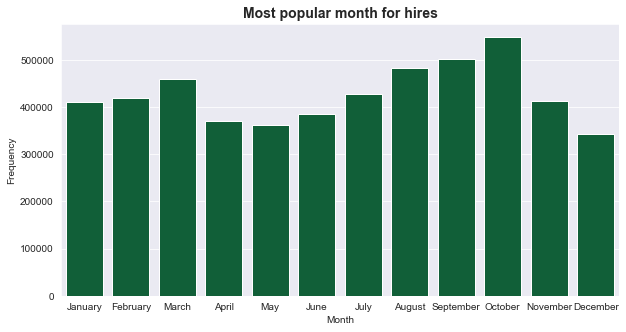

In [16]:
# Breakdown by month
plt.rcParams['figure.figsize'] = 10, 5
base_color = sns.color_palette('YlGn_r')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='start_month', color=base_color);
plt.title('Most popular month for hires', weight='bold').set_fontsize('14')
plt.xlabel('Month');
plt.ylabel('Frequency');

Most popular months for hires is October with over 55k closely followed by September.  The least popular is December which isn't surprising given that the majority of users would possibly be on holidays. 

### <font color="green"> Hires over 4 years (2017 - Aug 2020)
Below is an illustration of bike hires over a 4 year period.


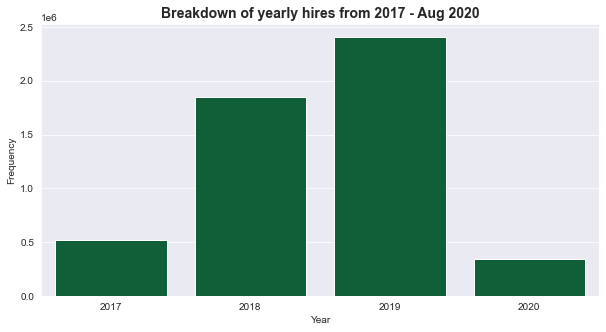

In [17]:
# Breakdown by year
plt.rcParams['figure.figsize'] = 10, 5
base_color = sns.color_palette('YlGn_r')[0]
sns.set_style('darkgrid')

sns.countplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='year', color=base_color);
plt.title('Breakdown of yearly hires from 2017 - Aug 2020', weight='bold').set_fontsize('14')
plt.xlabel('Year');
plt.ylabel('Frequency');

There has been a steady increase in bike hires from 2017 onwards rising to a peak of over 2.4m hires in 2019.  ALthough it would appear that 2020 is going to be less than 2019 even taking into account that the data is derived upto August with only 4 months to go until the end of the year.  

### <font color="green"> User Types 
Below is an illustration of the allocation split between Subscribers and Customers who hire bikes.

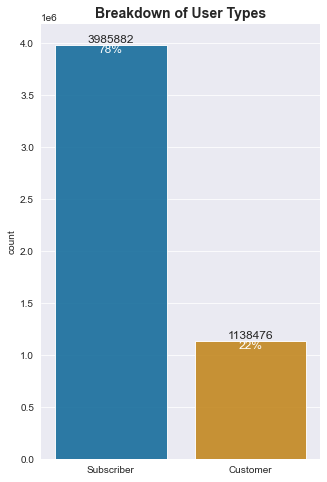

In [18]:
# Breakdown of user types

# Plotting 
fig, ax = plt.subplots(figsize = (5,8))

sns.countplot(x = "user_type", data = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, 
              order = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['user_type'].value_counts().index,
              palette = sns.color_palette('colorblind'), alpha=0.9)

# Percentage for each age-group
perc_list = []

# Calculate % for 2 user types 
type_sum = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5['user_type'].value_counts().to_list()
total_sum = df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5.shape[0]

# arrange the % list in same as annotate loop order
for i in range(0,len(type_sum)):
    percent = int(round(100 * type_sum[i] / total_sum))
    perc_list.append(percent) 
    
# Annotate 
i=0
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", size=12)
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="top", color='white', size=12)
    i+=1

# formatting
plt.title('Breakdown of User Types', weight='bold', size=14)
sns.despine(fig, left = True)
plt.xlabel("");

In total subscribers hire nearly four times as many bikes as customers with 78% of the total bike hires.

### <font color="green">Distance by User Type
Below is an illustration of distances traveled by each type of user

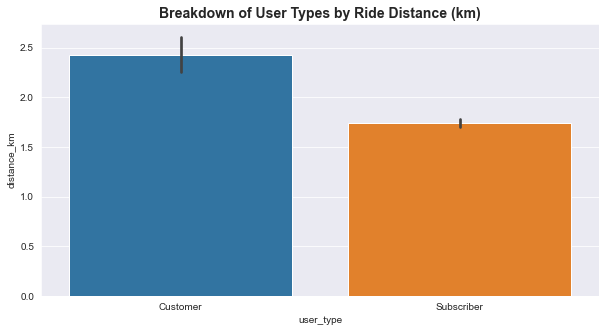

In [19]:
# returns breakdown of user type by distance
sns.barplot(x='user_type',  y='distance_km', data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5)
plt.title('Breakdown of User Types by Ride Distance (km)', weight='bold', size=14);

Although there are far more subscribers hiring bikes when it comes to distance customers travel a further distance then subscribers. In total they travel an average of just under 2.5 km which is more than than average 1.9 km total average.

### <font color="green">Duration by User Type
Below is an illustration of bike hire duration by each type of user

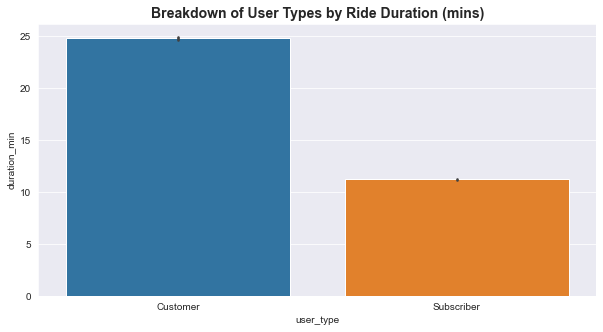

In [20]:
# returns breakdown of user type by duration
sns.barplot(x='user_type',  y='duration_min', data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5)
plt.title('Breakdown of User Types by Ride Duration (mins)', weight='bold', size=14);


When it comes to the duration of rides it appears that customers spend twice as long on their rides than subscribers, this is not a surprise majority of subscribers will be commuters whereas customers are more leisure riders and go out for longer.

### <font color="green">Monthly Number of Bike Hires by User Type
Below is an illustration of bike hire duration by each type of user

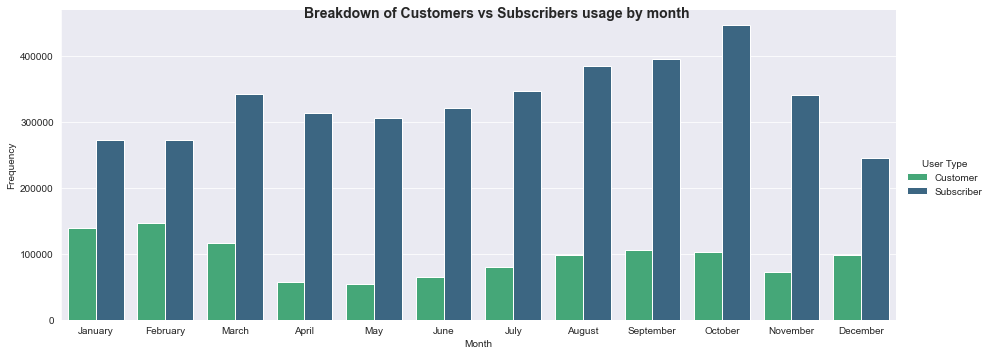

In [21]:
# returns breakdown of customers vs subsribers by month
g = sns.catplot(data=df_Ford_Go_Bike_2017_2020_Master_CLEAN_v5, x='start_month', hue='user_type', kind='count',aspect=20.7/8.27, color=base_color,
                palette='viridis_r')

g.set_axis_labels('Month', 'Frequency')
g._legend.set_title('User Type')
g.fig.suptitle('Breakdown of Customers vs Subscribers usage by month', fontsize=14, fontweight='bold');

Subscribers have by far the greater amount of usage throughout the year with October seeing the most hires for subscribers whereas February saw the highest for customers.

### <font color="green"> Conclusion
As a daily bike commuter (owner, not hirer) this project was interesting for me as I have seen over the years more & more commuters using the London equivalent of the Ford GoBike hire scheme.  The numbers re very impressive and from a climate change perspective it is very encouraging that so many people be subscribers or customers are using bicycles to travel.
    
The analysis shows that year-on-year the use of rental bikes is increasing although 2020 doesn't seem to be on the same upward trend.  It's clear that the majority of subscribers are work commuters  during the week as the highest bike hires take place in the morning and evening.   
   
I would say that the Ford GoBike system has been an unequivocal success and has benefits to not only the users (healthy exercise)  but also to the city of San Francisco in reduced traffic and congestion.   

Finally, it would have been a much more varied and detailed analysis if I was able to derive more details from the data such as age of users and gender.
    
    

In [22]:
!jupyter nbconvert UD_P5_Ford_GoBike_Slide_Deck_v3.ipynb --to slides --post serve --template output_toggle

Traceback (most recent call last):
  File "C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\traitlets\traitlets.py", line 535, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\traitlets\config\application.py", line 837, in launch_instance
    app.start()
  File "C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\byron\anaconda3\